In [ ]:
#Importing Libraries
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For Swiss Roll datasets
from sklearn.datasets import make_swiss_roll
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D

from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE



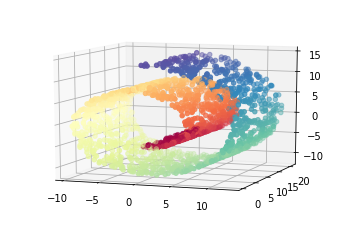

In [ ]:
#Generating the Swiss Roll dataset 2000 x 3 dimensions
X, color = make_swiss_roll(n_samples=2000)

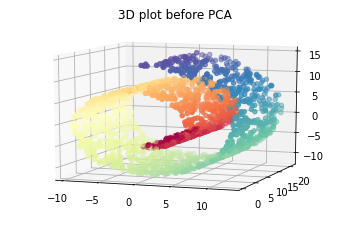

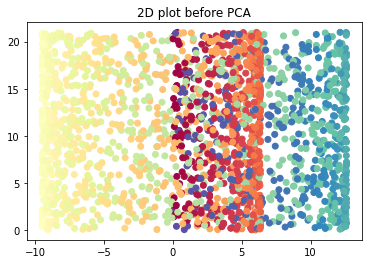

In [ ]:
#3D plot of the dataset before PCA
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(10, -70)
plt.title("3D plot before PCA")
plt.show()

#2D plot of the dataset before PCA
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("2D plot before PCA")
plt.show()

###PCA

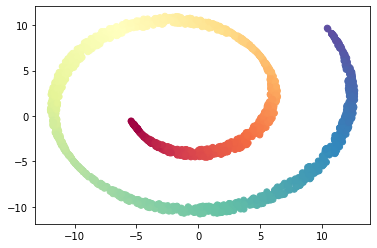

In [ ]:
# Create a PCA object with 2 principal components
pca = PCA(n_components=2)

# Fit the PCA model to the data and transform the data
X_pca = pca.fit_transform(X)

# Plot the transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Swiss Roll after PCA")
plt.show()


###LLE

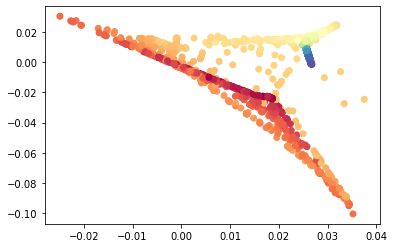

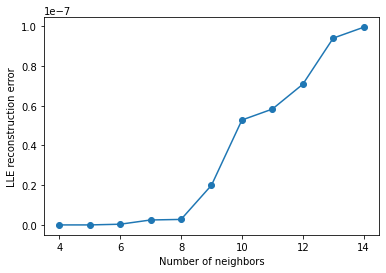

In [ ]:
# Create an LLE object with 2 components & 5 neighbours and fit_transform the data
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=5)
X_lle = lle.fit_transform(X)

# Plot the transformed data
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.Spectral)
plt.show()

# Define a range of number of neighbors to try
n_neighbors_range = np.arange(4, 15, 1)

# Compute the LLE reconstruction error for each number of neighbors
lle_errors = []
for n_neighbors in n_neighbors_range:
    lle = LocallyLinearEmbedding(n_components=2, n_neighbors=n_neighbors)
    X_lle = lle.fit_transform(X)
    lle_errors.append(lle.reconstruction_error_)

# Plot the LLE reconstruction error against the number of neighbors
plt.plot(n_neighbors_range, lle_errors, marker='o')
plt.xlabel('Number of neighbors')
plt.ylabel('LLE reconstruction error')
plt.title("Swiss Roll after LLE")
plt.show()

###MDS 

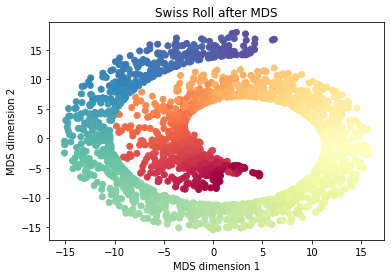

In [ ]:
# Compute the dissimilarity matrix using the Euclidean distance
D = pairwise_distances(X, metric='euclidean')

# Apply MDS to reduce the dimensionality of the dataset to 2 dimensions
mds = MDS(n_components=2, dissimilarity='precomputed')
X_mds = mds.fit_transform(D)

# Plot the MDS scatterplot
plt.scatter(X_mds[:,0], X_mds[:,1], c=color, cmap=plt.cm.Spectral)
plt.xlabel('MDS dimension 1')
plt.ylabel('MDS dimension 2')
plt.title("Swiss Roll after MDS")
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


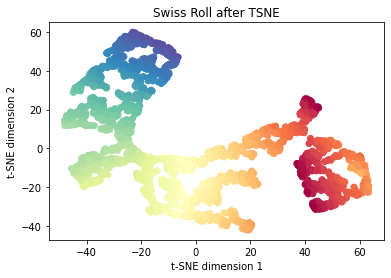

In [ ]:
# Apply t-SNE to reduce the dimensionality of the dataset to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the t-SNE scatterplot
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=color, cmap=plt.cm.Spectral)
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.title("Swiss Roll after TSNE")
plt.show()

###Part II.Digit Dataset

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
#Load the digits dataset and only use six first of the ten available classes

digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
n_neighbors = 30

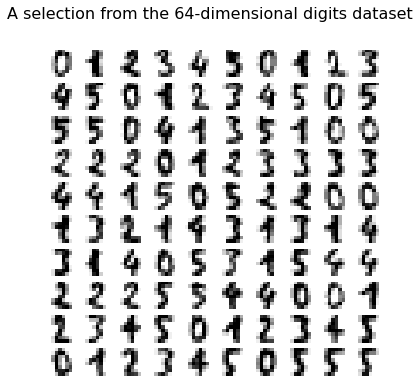

In [ ]:
#Plotting the first 100 digits from this dataset

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

In [ ]:
import numpy as np
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler


def plot_embedding(X, title):
    _, ax = plt.subplots()
    X = MinMaxScaler().fit_transform(X)

    for digit in digits.target_names:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.manifold import (
    Isomap,
    LocallyLinearEmbedding,
    MDS,
    SpectralEmbedding,
    TSNE,
)
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.random_projection import SparseRandomProjection

embeddings = {
    "Random projection embedding": SparseRandomProjection(
        n_components=2, random_state=42
    ),
    "Truncated SVD embedding": TruncatedSVD(n_components=2),
    "Linear Discriminant Analysis embedding": LinearDiscriminantAnalysis(
        n_components=2
    ),
    "Isomap embedding": Isomap(n_neighbors=n_neighbors, n_components=2),
    "Standard LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="standard"
    ),
    "Modified LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="modified"
    ),
    "Hessian LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="hessian"
    ),
    "LTSA LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="ltsa"
    ),
    "MDS embedding": MDS(
        n_components=2, n_init=1, max_iter=120, n_jobs=2),
    "Random Trees embedding": make_pipeline(
        RandomTreesEmbedding(n_estimators=200, max_depth=5, random_state=0),
        TruncatedSVD(n_components=2),
    ),
    "Spectral embedding": SpectralEmbedding(
        n_components=2, random_state=0, eigen_solver="arpack"
    ),
    "t-SNE embeedding": TSNE(
        n_components=2,
        n_iter=500,
        n_iter_without_progress=150,
        n_jobs=2,
        random_state=0,
    ),
    "NCA embedding": NeighborhoodComponentsAnalysis(
        n_components=2, init="pca", random_state=0
    ),
}

In [ ]:
from time import time

projections, timing = {}, {}
for name, transformer in embeddings.items():
    if name.startswith("Linear Discriminant Analysis"):
        data = X.copy()
        data.flat[:: X.shape[1] + 1] += 0.01  # Make X invertible
    else:
        data = X

    print(f"Computing {name}...")
    start_time = time()
    projections[name] = transformer.fit_transform(data, y)
    timing[name] = time() - start_time

Computing Random projection embedding...
Computing Truncated SVD embedding...
Computing Linear Discriminant Analysis embedding...
Computing Isomap embedding...
Computing Standard LLE embedding...
Computing Modified LLE embedding...
Computing Hessian LLE embedding...
Computing LTSA LLE embedding...
Computing MDS embedding...
Computing Random Trees embedding...
Computing Spectral embedding...
Computing t-SNE embeedding...


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Computing NCA embedding...


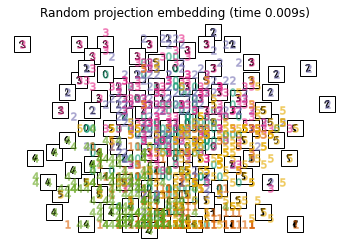

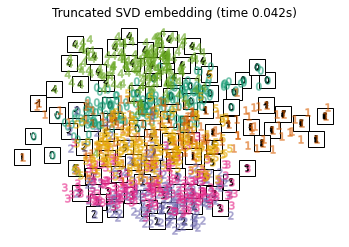

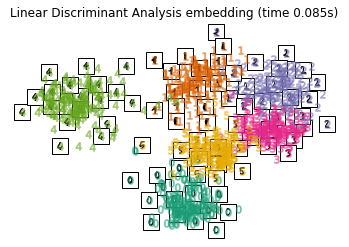

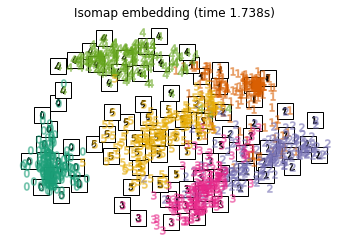

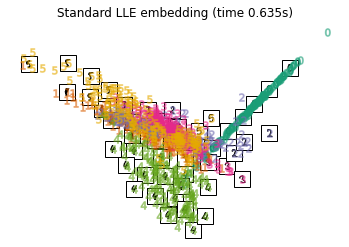

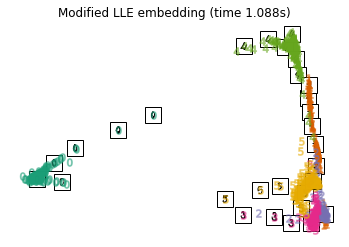

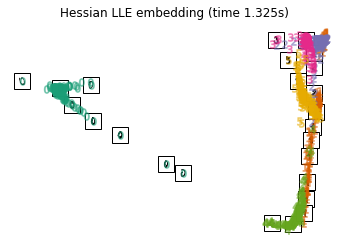

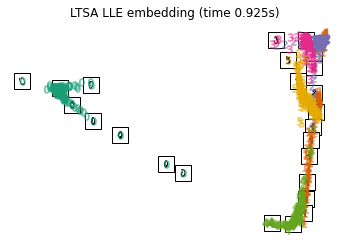

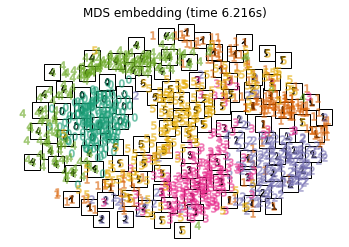

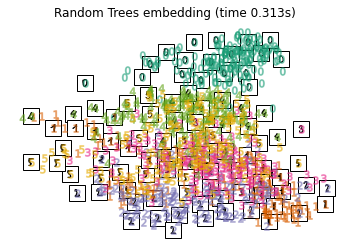

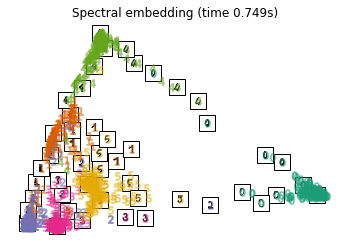

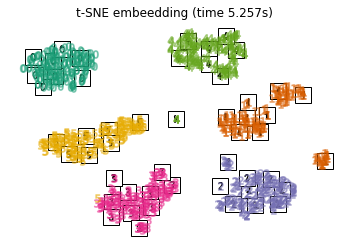

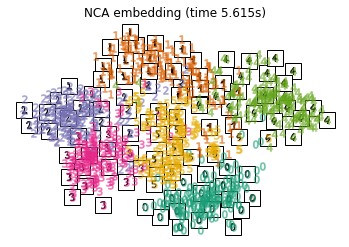

In [ ]:
for name in timing:
    title = f"{name} (time {timing[name]:.3f}s)"
    plot_embedding(projections[name], title)

plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a decision tree classifier on each of the projections and compute the accuracy
errors = {}
for name, projection in projections.items():
    clf = DecisionTreeClassifier(random_state=42)
    X_proj_train, X_proj_test = train_test_split(projection, test_size=0.3, random_state=42)
    clf.fit(X_proj_train, y_train)
    accuracy = clf.score(X_proj_test, y_test)
    errors[name] = 1 - accuracy

# Print the errors
for name, error in errors.items():
    print(f"{name}: error = {error:.3f}")


Random projection embedding: error = 0.662
Truncated SVD embedding: error = 0.446
Linear Discriminant Analysis embedding: error = 0.083
Isomap embedding: error = 0.185
Standard LLE embedding: error = 0.388
Modified LLE embedding: error = 0.105
Hessian LLE embedding: error = 0.080
LTSA LLE embedding: error = 0.077
MDS embedding: error = 0.185
Random Trees embedding: error = 0.474
Spectral embedding: error = 0.105
t-SNE embeedding: error = 0.003
NCA embedding: error = 0.123


In [ ]:
#Applying Decision tree classification model 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.90


The accuracy of the model is 0.90, which means that 90% of the images were correctly classified by the model. This is a good metric to use to get a general sense of how well the model is performing, but it doesn't give us a complete picture of the model's performance.

Overall, the decision tree model seems to be performing reasonably well on this dataset, but may not be the best choice (it can be overfitting). For precise classification we can use random forests or support vector machines.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {}

for name, projection in projections.items():
    clf = DecisionTreeClassifier(random_state=42)
    X_train_proj = clf.transform(X_train, y_train)
    X_test_proj = clf.transform(X_test)
    clf.fit(X_train_proj, y_train)
    y_pred = clf.predict(X_test_proj)
    results[name] = {
        "classification_report": classification_report(y_test, y_pred),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }


AttributeError: ignored

In [ ]:
for name, result in results.items():
    print(f"Results for {name}:")
    print(result["classification_report"])
    print("Confusion matrix:")
    print(result["confusion_matrix"])
    print()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.8986175115207373
